# Project: Wrangling and Analyze Data

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is the tweet archive of Twitter user `@dog_rates`, also known as `WeRateDogs`. `WeRateDogs` is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators is Almost always greater than 10. 11/10, 12/10, 13/10, etc.

## Data Gathering
- I directly downloaded the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Importing Necessary Libraries
import pandas as pd
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [2]:
twitter_archive= pd.read_csv('/content/twitter-archive-enhanced.csv')

- I used the Requests library to programmatically download the tweet image prediction (image_predictions.tsv)

In [3]:
#create a folder
folder_name = 'img_pred'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#create the request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Access The Contents and Write To A File
with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [5]:
# Checking Folder To Ensure It Worked.
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
image_prediction= pd.read_table('/content/image-predictions.tsv')

- I downloaded the (tweet_json.txt) from Udacity because my developer's account was not approved.

In [7]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [9]:
tweet_json = []
with open('tweet-json.txt','r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        
        tweet_json.append({'tweet_id':tweet_id,'retweet_count': retweet_count,
                    'favorite_count': favorite_count})
tweet_json = pd.DataFrame(tweet_json)


In the json file I didn't see any other json object or json array that could be useful in this analysis.

## Assessing Data


In [10]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
sum(twitter_archive.duplicated())

0

In [15]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1598,799297110730567681,https://pbs.twimg.com/media/CxeseRgUoAM_SQK.jpg,1,malamute,0.985028,True,Siberian_husky,0.005834,True,Eskimo_dog,0.005443,True
2003,877201837425926144,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,Pembroke,0.931120,True,Cardigan,0.068698,True,basenji,0.000082,True
297,671390180817915904,https://pbs.twimg.com/media/CVFBzpXVEAAHIOv.jpg,1,zebra,0.997673,False,tiger,0.000837,False,prairie_chicken,0.000575,False
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False
54,667044094246576128,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,1,golden_retriever,0.765266,True,Labrador_retriever,0.206694,True,seat_belt,0.010667,False


In [17]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [21]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues

- twitter_archive

1. Some rows are replies and not original tweets.


2. Missing values in the some columns.



3. Some rows and columns are retweets not original tweets.


4. Wrong datatype for timestamp i.e object instead of datetime.


5. HTML tags are still in the source columns .


6. The maximum `rating_numerator` (1776.0) seems ununsual.



7. 'a', 'quite', 'not', 'by' etc in the `name` columns seems unusual




- image_prediction


8. `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`,	`p3_dog` aren't necessary as these are the algorithm's second and third most likely prediction.


9.  Some of the `p1_dog` appears to be false .


10. `p1` column name isn't descriptive enough.

### Tidiness issues
### Twitter archive
1) Merge the doggo, floofer, pupper, puppo columns to form one column i.e dog_stages

2) Merge the three datasets into a cleaned dataset `twitter_archive_master.csv`

## Cleaning Data

In [22]:
# Make copies of original pieces of data before cleaning.
twitter_archive_clean = twitter_archive.copy()
img_pred_clean = image_prediction.copy()
tweet_json_clean  = tweet_json.copy()

### Quality Issue : twitter_archive_clean

### Define

1. Drop non-null rows that are replies not original tweets

### Code

In [23]:
reply = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.notnull()].index.tolist()
twitter_archive_clean.drop(reply, inplace = True)

reply_user = twitter_archive_clean[twitter_archive_clean.in_reply_to_user_id.notnull()].index.tolist()
twitter_archive_clean.drop(reply_user, inplace = True)

### Test

Checking if the non-null rows of the `in_reply_to_status_id` and `in_reply_to_user_id` are still present.

In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

### Define

2. Drop columns with missing values using  pandas'`drop`.

#### Code

In [25]:
# first i want to check columns with missing values
twitter_archive_clean.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [26]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'expanded_urls'], axis = 1, inplace = True)

#### Test

In [27]:
# Checking if the columns have been dropped successfully
twitter_archive_clean.isnull().sum()

tweet_id                         0
timestamp                        0
source                           0
text                             0
retweeted_status_id           2097
retweeted_status_user_id      2097
retweeted_status_timestamp    2097
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Define

3. Drop rows and columns that are retweets and not original tweets.

### Code

First I will drop the retweeted rows using pandas' drop.

In [28]:
retweets = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].index.tolist()
twitter_archive_clean.drop(retweets, inplace = True)

Next, I will drop the retweeted columns.

In [29]:
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [30]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [31]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Define

4. Change datatype for `timestamp` to datetime using pandas' `to_datetime`

### Code

In [32]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

### Test

In [33]:
# Checking the datatype of `timestamp` 
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

### Define

5. Remove the html tags from the source column using pandas' `str.replace`method and regex .

### Code

In [34]:
twitter_archive_clean.source = twitter_archive_clean.source.str.replace(r'<[^<>]*>', '', regex=True)

### Test

In [35]:
twitter_archive_clean.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2097, dtype: object

In [36]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Define

6. Remove `rating_numerator` with value 1776.0 using pandas' drop method.

### Code

In [37]:
# First I want to Check for that row
twitter_archive_clean.query('rating_numerator == 1776')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,1776,10,Atticus,None,None,None,None


In [38]:
twitter_archive_clean.drop(979, inplace=True)

### Test

In [39]:
twitter_archive_clean.query('rating_numerator == 1776')

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define

7. Change names like 'a', 'quite', 'not', 'by' , etc in the `name` columns cause they seem unusual.

### Code

In [40]:
# Checking names
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

Here, I noticed that most of the false dog names are in lower cases and I have to change them

In [41]:
twitter_archive_clean.loc[twitter_archive.name.str.islower(),'name'] = None

In [42]:
twitter_archive_clean.name=twitter_archive_clean.name.fillna('None')

### Test

In [43]:
twitter_archive_clean.name.value_counts()

None          707
Charlie        11
Lucy           11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

### Define

8. Dropping `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog`as they  aren't necessary since they are algorithm's second and third most likely prediction.

### Code

In [44]:
# Using pandas' drop
img_pred_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf', 'p3_dog'], axis = 1, inplace = True)

### Test

In [45]:
img_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


### Define

9. Drop rows where `p1_dog` is false

### Code

In [46]:
# First I want to check for rows where `p1_dog` is false
img_pred_clean.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False
...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False


Over 543 rows have `p1_dog` to be false, I accessed their `jpg_url` and some of the images aren't dogs. I decided to drop these rows.

In [47]:
# Here i'm dropping the rows using pandas' drop
img_pred_clean = img_pred_clean.drop(img_pred_clean[img_pred_clean.p1_dog == False].index)

### Test

In [48]:
# Confirming if the code worked and the rows have been dropped
img_pred_clean.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog


#### Define

10. Change `p1` name as it isn't descriptive enough using pandas' rename.

### Code

In [49]:
img_pred_clean.rename(columns={'p1':'dog_breed'}, inplace=True)

### Test

In [50]:
img_pred_clean.head()

,tweet_id,jpg_url,img_num,dog_breed,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


### Tidiness Issue:

### Define

- Merge the doggo, floofer, pupper, puppo columns to form one column i.e dog_stages.

In [51]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


#### Code

In [52]:
twitter_archive_clean.doggo.replace('None', '', inplace=True)  
twitter_archive_clean.doggo.replace(np.NaN, '', inplace=True)

twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace(np.NaN, '', inplace=True)

twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace(np.NaN, '', inplace=True)

twitter_archive_clean.puppo.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace(np.NaN, '', inplace=True)

In [53]:
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

#### Test

In [54]:
# Checking if the columns have been melted
twitter_archive_clean.stage.value_counts()

                  1760
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

### Define

- Merge the three datasets into a cleaned dataset twitter_archive_master.csv using pandas' merge.

### Code

In [55]:
print(twitter_archive_clean.shape)
print(img_pred_clean.shape)
print(tweet_json_clean.shape)

(2096, 12)
(1532, 6)
(2354, 3)


In [56]:
merge = pd.merge(twitter_archive_clean, img_pred_clean, on = 'tweet_id', how = 'inner')

In [57]:
twitter_archive_master = pd.merge(merge, tweet_json_clean, on = 'tweet_id', how='inner') 

### Test

In [58]:
twitter_archive_master

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,jpg_url,img_num,dog_breed,p1_conf,p1_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,,,,,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,,,,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,2158,12041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,,,,,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,41,111
1459,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,None,,,,,,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,147,311
1460,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,None,,,,,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,47,128
1461,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,None,,,,,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,48,132


In [59]:
twitter_archive_master.shape

(1463, 19)

In [60]:
# Here im trying to confirm the name column.
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1463 non-null   int64              
 1   timestamp           1463 non-null   datetime64[ns, UTC]
 2   source              1463 non-null   object             
 3   text                1463 non-null   object             
 4   rating_numerator    1463 non-null   int64              
 5   rating_denominator  1463 non-null   int64              
 6   name                1463 non-null   object             
 7   doggo               1463 non-null   object             
 8   floofer             1463 non-null   object             
 9   pupper              1463 non-null   object             
 10  puppo               1463 non-null   object             
 11  stage               1463 non-null   object             
 12  jpg_url             1463 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

In [62]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,jpg_url,img_num,dog_breed,p1_conf,p1_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,,,,,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,,,,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,2158,12041


## Analyzing and Visualizing Data

### Insights and Visualizations :

1. What dog_breed was predicted the most?

In [63]:
twitter_archive_master.dog_breed.value_counts()

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
clumber                 1
Name: dog_breed, Length: 111, dtype: int64

From the value count above, Golden Retriever was the most predicted dog with a count of 556 predictions.

2. What device do people post with more often?

In [64]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1437
Twitter Web Client      19
TweetDeck                7
Name: source, dtype: int64

From the value count above, iPhone was the most popular device most people used to post their dogs with a count of 5764. 

3. What is the least retweeted dog breed?

In [65]:
twitter_archive_master.groupby(['dog_breed']).retweet_count.sum().sort_values(ascending=True)

dog_breed
groenendael              413
Japanese_spaniel         471
EntleBucher              706
Brabancon_griffon        863
standard_schnauzer       928
                       ...  
Samoyed               184922
Chihuahua             219610
Pembroke              280367
Labrador_retriever    365109
golden_retriever      501225
Name: retweet_count, Length: 111, dtype: int64

From the insight above the least retweeted dog breed is Groenendael with 1652 retweets.

### Visualization

1. What dog has the highest retweet count?

In [66]:
from matplotlib.pyplot import figure

In [67]:
def barplot(x,y, title,X_label, y_label):
    """This is a function that lots a barchart"""
    
    plt.bar(x,y)
    plt.xticks(rotation=60)
    sns.set(rc={'figure.figsize':(16,8)})
    title= title
    plt.show();

In [68]:
# Here I'm creating a variable that returns the top 10 retweeted dogs.
top_10_retweet = twitter_archive_master.retweet_count.sort_values(ascending=False)[0:11]
top_10_dogs = twitter_archive_master.dog_breed[0:11]

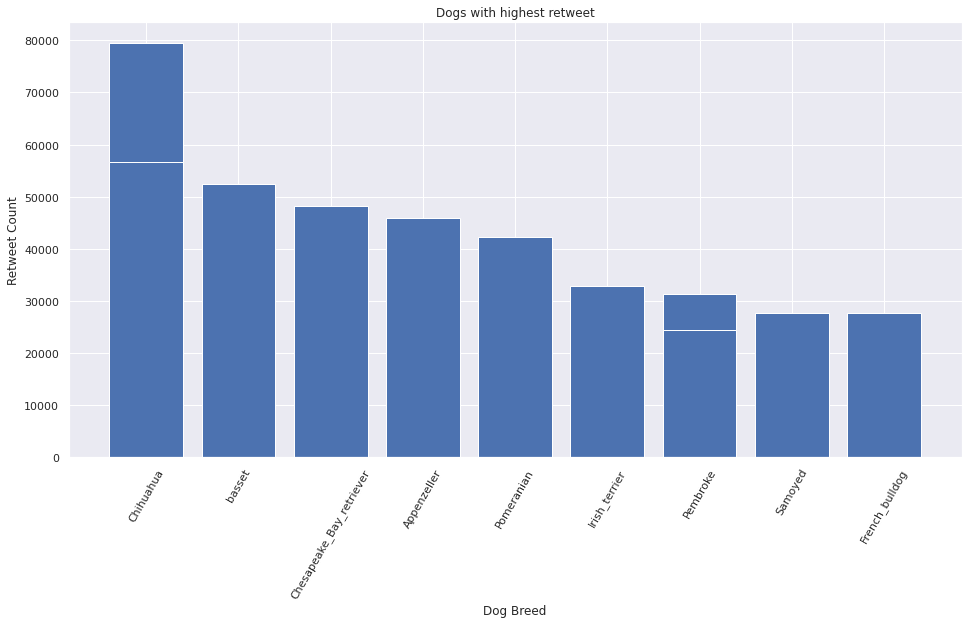

In [72]:
barplot(top_10_dogs,top_10_retweet,plt.title('Dogs with highest retweet'),plt.xlabel('Dog Breed'), plt.ylabel('Retweet Count'))

From the visualization above Chihuahua was the most retweeted dog.

2. What dog has the highest favorite_count?

In [70]:
# Here I'm creating a variable that returns the top 10 liked dogs.
top_10_like = twitter_archive_master.favorite_count.sort_values(ascending=False)[0:11]

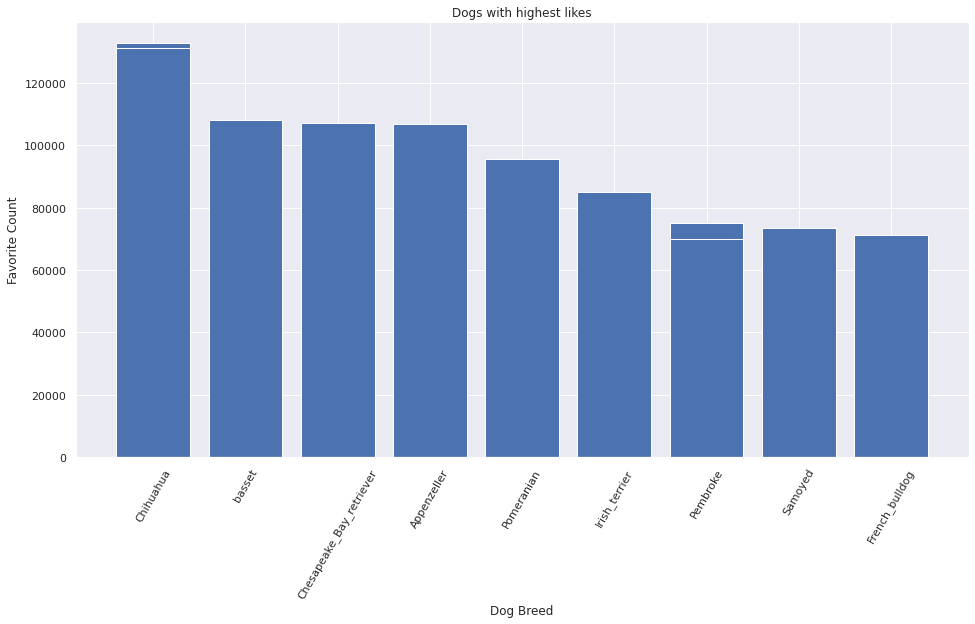

In [71]:
barplot(top_10_dogs,top_10_like,plt.title('Dogs with highest likes'),plt.xlabel('Dog Breed'),plt.ylabel('Favorite Count'))

From the visualization above Chihuahua was also the most liked dog.